# <font color = 'red'> CIFAR-10 Classification using Convolutional Neural Nets

## <font color = "brown"> Information about CIFAR-10

<font color = "green">
It stands for Canadian Institute for Advanced Research.
<br>
    
It is used widely for ML and Computer Vision Applications.
    <br>
    
It contains 60000 images of 32 x 32 resolution of 10 different classes which implies 6000 images of each class.
    <br>
    
Download link for the Dataset is: -     https://www.cs.toronto.edu/~kriz/cifar.html
    <br>
    
Different classes of images are: -<br>
 
1. Airplanes<br>
2. Cars<br>
3. Birds <br>
4. Cats <br>
5. Deer <br>
6. Dogs<br>
7. Frogs<br>
8. Horses<br>
9. Ships <br>
10. Trucks<br>

## <font color = "brown"> How *Convolutional Neural Nets* (CNN) works? 


In CNN there are some layers present, which are explained in the detail in following steps: -

    
- First of all, **feature extraction** convolutional layer is present, which will extract the features of the images. In this layer, we specify the number of filters that will be used to extract the features.

    
- Then, there is another layer which is named as **"DownSampling"** or **"Pooling"** is present. This layer will extract the most important features from the already extracted features in the previous layer. It can be done either by MaxPooling or AveragePooling. For example, consider the size of feature extractor in the previous layer of 3x3, then the downsampling feature will be of size 2x2, and it will be applied to all the possible 2x2 matrices in the 3x3 matrix, to extract the features according to the pooling used.


-  Then, we have **Dropouts** Layer, in this we specify the amount of neurons in percentage manner(like 0.1, 0.2, .....  1) to drop, beause there are some neurons which are randomly subsampled and can cause overfitting. So, we remove them.


- Obtained matrices are flattened, using **Flatten** layer.


- Fully Connected **Dense** Layer is present, which takes input from the Flatten Layer.


- Finally, **Output** layer is present which provides the specific output.

## <font color = 'brown'>Importing Required Libraries

In [87]:
import pandas as pd            # For using dataframes.
import numpy as np            # For using numpy arrays
import matplotlib.pyplot as plt    # For plotting the visuals.
import tensorflow.keras                                     # For using artificial neural networks.
import keras                                             # For changing data to categorical values.
from keras.models import Sequential                         # For building a Sequential model.
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout    # For CNN layer processing
from keras.callbacks import TensorBoard         # 
from keras.datasets import cifar10            # To import dataset
from math import ceil                  # Used in training of augmented Model.

## <font color = 'brown'>Importing Dataset 

In [44]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## <font color = 'brown'> Visualizing Dataset  

In [45]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

[7]


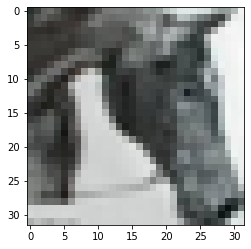

In [46]:
i = 13597
plt.imshow(x_train[i])
print(y_train[i])

## <font color = 'brown'> Data Preparation

In [47]:
x_train = x_train.astype("float32")     # Converting the data to float32 for efficient processing, before it was uint8
x_test = x_test.astype("float32")
num_of_categories = 10              # Assigning number of categories in the model

In [48]:
y_train        # It contains values from 0 to 9

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [49]:
# Converting data into categorical form, it is neccessary because it is possible that without this conversion, 
# the model may consider 9 > 1, making one class the superior than others.
y_train = keras.utils.to_categorical(y_train, num_of_categories)       
y_test = keras.utils.to_categorical(y_test, num_of_categories)

In [50]:
y_train.shape

(50000, 10)

In [51]:
x_train = x_train/255
x_test = x_test/255           # Normalizing x for efficient processing.

In [52]:
Input_Shape = x_train.shape[1:]       # Retreiving the shape/resolution of the images.
Input_Shape

(32, 32, 3)

## <font color = "brown"> Creating a CNN model

In [65]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", input_shape = Input_Shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

In [66]:
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = "relu"))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = "relu"))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

In [67]:
cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = "relu"))
cnn_model.add(Dense(units = 1024, activation = "relu"))

cnn_model.add(Dense(units = 10, activation = "softmax"))

cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 128)         0         
__________

In [68]:
cnn_model.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.rmsprop(lr = 0.001), metrics = ["accuracy"])

## <font color = "brown"> Training The Model

In [69]:
history = cnn_model.fit(x_train, y_train, batch_size = 15, epochs = 1, shuffle = True)    
# epochs represent number of times data will be transfered to the model, 
# shuffle will ensure no overfitting, and
# batch_size represents amount of images passed in one go.
# Here acuuracy obtained is very poor, because I have used only 1 epoch, if I have trained it for around 50 epochs, 
# accuracy would have been amazing.

Epoch 1/1
50000/50000 [==============================] - 782s 16ms/step - loss: 1.6735 - acc: 0.4079


## <font color = "brown"> Evaluating The Model

In [70]:
evaluation_score = cnn_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 14s 1ms/step


In [71]:
print("Test accuracy is = ", evaluation_score[1])

Test accuracy is =  0.4355


In [72]:
predicted_classes = cnn_model.predict_classes(x_test)

In [73]:
predicted_classes

array([5, 1, 1, ..., 7, 4, 7])

In [74]:
original_classes = y_test.argmax(1)        # Converting y_test back to original classes

In [75]:
original_classes

array([3, 8, 8, ..., 5, 1, 7])

In [76]:
from sklearn.metrics import accuracy_score     # For checking accuracy of classes

In [77]:
accuracy = accuracy_score(predicted_classes, original_classes)

In [78]:
accuracy

0.4355

## <font color = "brown"> Visualizing The Model

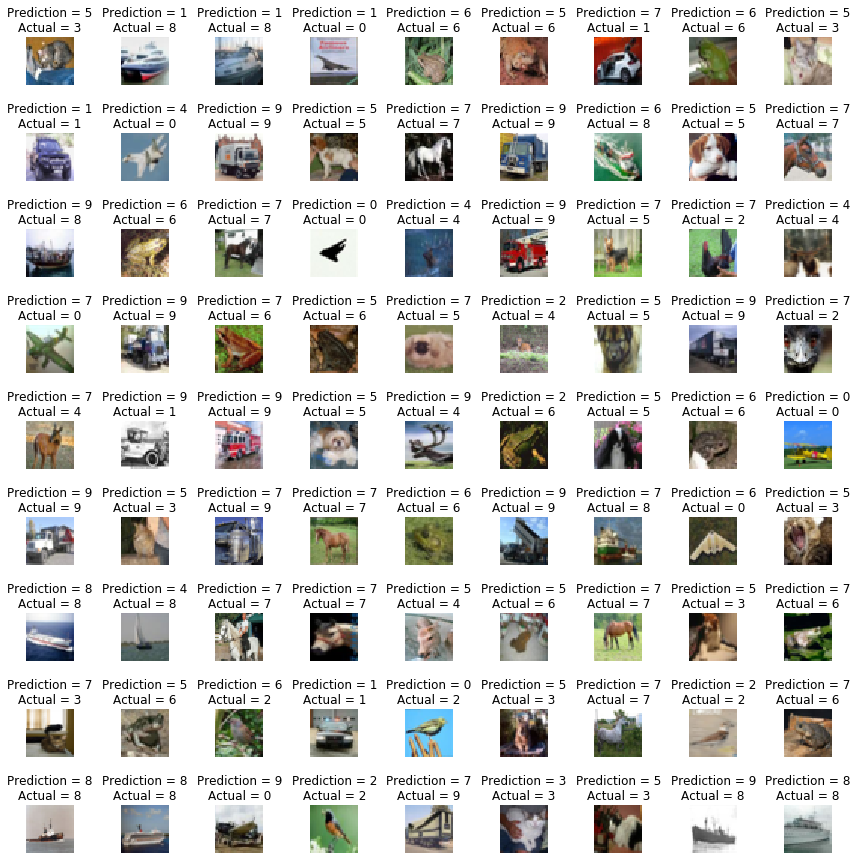

In [79]:
L = 9
W = 9
fig, axes = plt.subplots(L, W, figsize = (15,15))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Prediction = {}\nActual = {}".format(predicted_classes[i], original_classes[i]))
    axes[i].axis("off")
plt.subplots_adjust(hspace = 1)

In [80]:
from sklearn.metrics import confusion_matrix      # To use confusion_matrix  
import seaborn as sns           # To use HeatMap

In [81]:
cm = confusion_matrix(original_classes, predicted_classes)

In [82]:
cm

array([[441,  52,  65,   5,  47,  32,  12, 244,  11,  91],
       [  6, 646,   5,   2,   6,  12,  20,  90,   0, 213],
       [ 27,   6, 283,   6,  66, 201,  53, 349,   0,   9],
       [  3,   9,  22,  28,  20, 512,  36, 361,   0,   9],
       [  2,   7,  96,   7, 196, 137,  45, 505,   0,   5],
       [  0,   4,  23,   4,  17, 539,  12, 399,   0,   2],
       [  0,   4,  33,  27,  38, 226, 458, 205,   0,   9],
       [  1,   1,   4,   0,   5,  66,   2, 915,   0,   6],
       [223, 180,  30,   8,  26,  37,  13, 183, 151, 149],
       [  8,  76,   0,   1,   2,  23,  28, 164,   0, 698]])

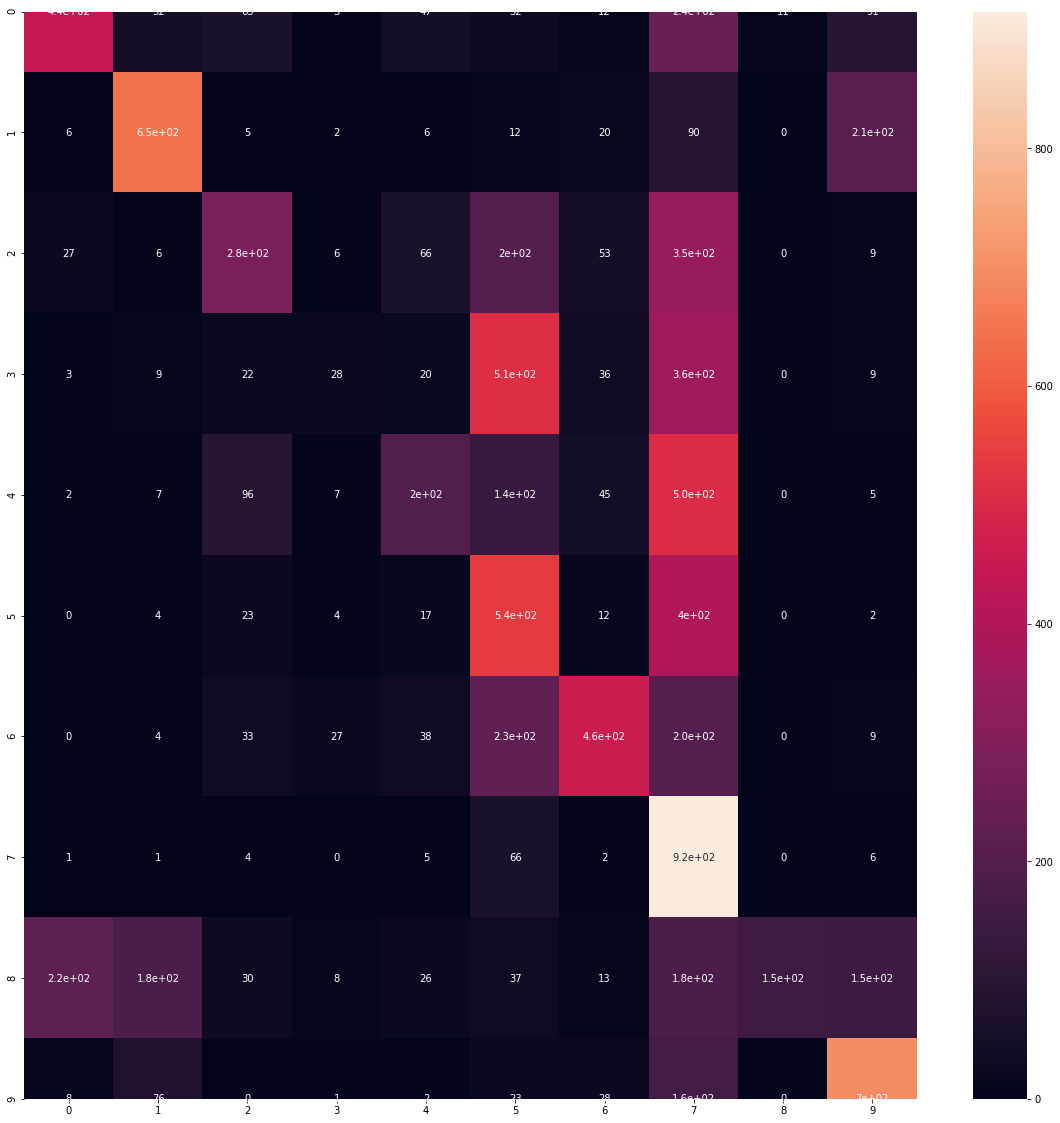

In [83]:
plt.figure(figsize = (20,20))
sns.heatmap(cm, annot = True)
plt.show()

## <font color = "BRown"> Saving the Model

In [99]:
import os

In [71]:
directory = os.path.join(os.getcwd(), "Models_Saved")
if not os.path.isdir(directory):
    os.makedirs(directory)
    
model_path = os.path.join(directory, "keras_CIFAR10.h5")
cnn_model.save(model_path)

## <font color = "brown"> Data Augmentation

#### <font color = "red"> It will make the model more general and makes it more efficient.

In [4]:
(x1_train, y1_train), (x1_test, y1_test) = cifar10.load_data()

In [5]:
x1_train = x1_train.astype("float32")
x1_test = x1_test.astype("float32")

In [6]:
x1_train = x1_train/255
x1_test = x1_test/255

In [29]:
n = 20
x1_train_sample = x1_train[:n]

In [92]:
from keras_preprocessing.image import ImageDataGenerator     # To Generate multiple variations in the image
datagen_train = ImageDataGenerator(rotation_range = 90,
                                   vertical_flip = True,
                                   horizontal_flip = True,
                                   height_shift_range = 0.5,
                                   width_shift_range = 0.5)
                                   #brightness_range = (1,5))
datagen_train.fit(x1_train_sample)           # Fitting the data

In [93]:
from PIL import Image     # To create an image from an array

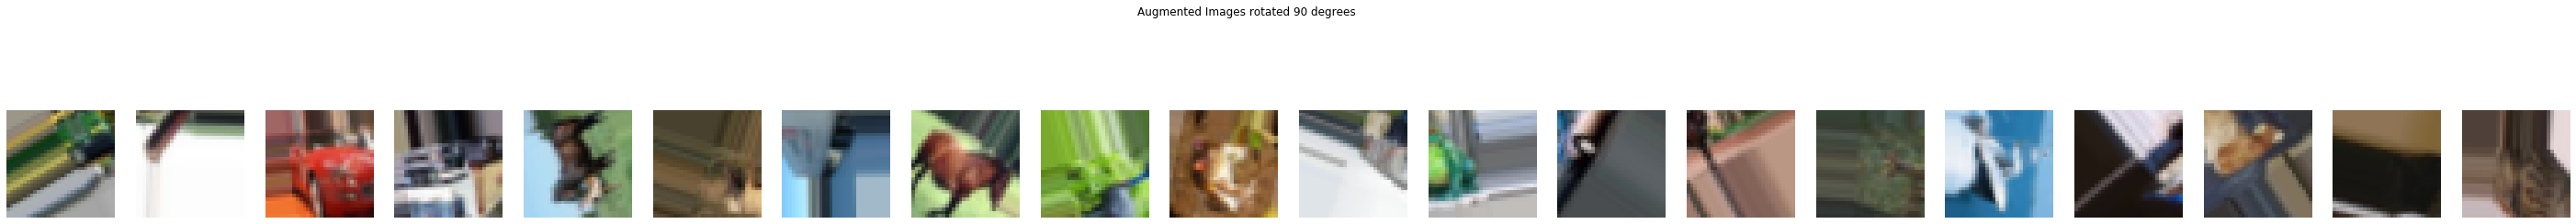

In [94]:
fig = plt.figure(figsize = (50,5))

for x_batch in datagen_train.flow(x1_train_sample, batch_size = n):
    for z in range(0, n):
        ax = fig.add_subplot(1, n, z+1)
        ax.imshow(Image.fromarray((x_batch[z]*255).astype(np.uint8)))
        ax.axis("off")
    fig.suptitle("Augmented Images rotated 90 degrees")
    plt.show()
    break

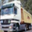

In [42]:
# Checking a sample Image
Image.fromarray((x1_train_sample[1]*255).astype("uint8"))

## <font color = "brown"> Model Training using Augmented Data

In [95]:
datagen = ImageDataGenerator(rotation_range = 90,
                                   vertical_flip = True,
                                   horizontal_flip = True,
                                   height_shift_range = 0.5,
                                   width_shift_range = 0.5)
                                   #brightness_range = (1,3))
datagen.fit(x_train)           

In [96]:
bs = 15
cnn_model.fit_generator(
    datagen.flow(x_train, y_train, batch_size = bs),
    steps_per_epoch = ceil(len(x_train)/bs),
    epochs = 2,
    verbose = 1)

# we are getting low accuracy here because of very few epochs.

Epoch 1/2
3334/3334 [==============================] - 671s 201ms/step - loss: 2.7954 - acc: 0.2209
Epoch 2/2
3334/3334 [==============================] - 596s 179ms/step - loss: 2.0339 - acc: 0.2457


In [97]:
accuracy = cnn_model.evaluate(x_test, y_test)
print("Test Accuracy = ",accuracy[1])

10000/10000 [==============================] - 14s 1ms/step
Test Accuracy =  0.2944


## <font color = "brown"> Saving The Augmented Model

In [100]:
directory = os.path.join(os.getcwd(), "Models_Saved")
if not os.path.isdir(directory):
    os.makedirs(directory)
    
model_path = os.path.join(directory, "keras_CIFAR10_Augmented.h5")
cnn_model.save(model_path)